
# **Proyecto Telecom X - Etapa 2 - Machine Learning**

---

,,,
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluación
from sklearn.metrics import classification_report, confusion_matrix
,,,

##**Extracción del archivo**



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
URL = 'https://raw.githubusercontent.com/Robacru/Desafio_data_science2_TelecomX_R_Baez/main/TelecomX_datos_tratados.csv'

datos_iniciales = pd.read_csv(URL)
datos_iniciales

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


**Descripción de las columnas y/o datos**

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente
- `Cuentas_Diarias`: gastos por mes divido en 30 ds.

---

##**Eliminación de columnas irrelevantes para el análisis del proyecto**

In [ ]:
datos = datos_iniciales.drop(columns = ['customerID', 'Cuentas_Diarias'])
datos

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,1,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,1,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,1,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,0,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,0,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


---

##**Encoding de variables categóricas**

In [ ]:
# para saber qué datos se han almacenado en las columnnas
# y que muestre menos de 50 si los datos almacenados son muchos
# separando cada resultado de la columna con una línea de 50 '-'
for col in datos.columns:
  print(f"valores únicos en la columna'{col}': {datos[col].nunique()}")
  if datos[col].nunique() < 50:
    print(datos[col].unique())
    print('-' * 50)

valores únicos en la columna'Churn': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'tenure': 73
valores únicos en la columna'PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'InternetService': 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
valores únicos en la columna'OnlineSecurity': 3
['No' 'Yes' 'No intern

In [ ]:
# cambiar el dato "No internet service" por un "No" ya que va directamente relacionado con si se tiene o no Internet
# Lista de columnas donde aparece "No internet service"
cols_con_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Reemplazar en cada columna
for col in cols_con_internet:
    datos[col] = datos[col].replace({'No internet service': 'No'})

In [ ]:
datos.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')

In [ ]:
# Detectar columnas con solo "Yes" y "No"
cols_yes_no = [col for col in datos.columns if set(datos[col].dropna().unique()) <= {'Yes', 'No'}]

# Reemplazar y convertir a entero explícitamente
for col in cols_yes_no:
    datos[col] = datos[col].replace({'Yes': 1, 'No': 0})
    datos[col] = datos[col].infer_objects(copy=False).astype(int)

datos.sample(10)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
3758,1,Male,0,0,0,1,1,Yes,Fiber optic,0,1,0,0,0,1,Month-to-month,1,Credit card (automatic),90.85,90.85
239,0,Female,0,0,0,40,1,No,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),19.65,830.25
201,0,Male,0,0,0,9,1,No,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,19.85,178.80
1842,0,Female,0,1,0,3,1,No,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,20.85,72.00
3517,1,Female,0,0,0,1,1,No,DSL,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),44.90,44.90
4242,1,Male,0,0,0,1,1,Yes,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,75.45,75.45
5892,1,Female,1,0,0,1,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.55,70.55
5799,0,Female,0,1,0,20,1,No,Fiber optic,0,0,1,1,0,0,Month-to-month,1,Mailed check,81.00,1683.70
6392,1,Male,1,0,0,1,0,No phone service,DSL,0,0,1,0,0,1,Month-to-month,1,Electronic check,39.65,39.65
188,0,Male,0,1,1,52,0,No phone service,DSL,0,1,1,1,1,0,Two year,0,Mailed check,50.20,2554.00


In [ ]:
# para saber qué datos se han almacenado en las columnnas
# y que muestre menos de 50 si los datos almacenados son muchos
# separando cada resultado de la columna con una línea de 50 '-'
for col in datos.columns:
  print(f"valores únicos en la columna'{col}': {datos[col].nunique()}")
  if datos[col].nunique() < 50:
    print(datos[col].unique())
    print('-' * 50)

valores únicos en la columna'Churn': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'Partner': 2
[1 0]
--------------------------------------------------
valores únicos en la columna'Dependents': 2
[1 0]
--------------------------------------------------
valores únicos en la columna'tenure': 73
valores únicos en la columna'PhoneService': 2
[1 0]
--------------------------------------------------
valores únicos en la columna'MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'InternetService': 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
valores únicos en la columna'OnlineSecurity': 2
[0 1]
-------------------------------------

In [ ]:
# identificar las columnas con variables categóricas con más de dos categorías

cols_categoricas = [
    'gender', 'InternetService', 'Contract', 'PaymentMethod',
    'MultipleLines']

In [ ]:
datos_encoded = pd.get_dummies(datos, columns=cols_categoricas, drop_first=True)

for col in datos_encoded.columns:
    if datos_encoded[col].dtype == 'bool':
        datos_encoded[col] = datos_encoded[col].astype(int)

datos_encoded

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes
0,0,0,1,1,9,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,9,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,1,0,0,0,4,1,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0
3,1,1,1,0,13,1,0,1,1,0,...,1,1,0,0,0,0,1,0,0,0
4,1,1,1,0,3,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,13,1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
7263,1,0,1,0,22,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,1
7264,0,0,0,0,2,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
7265,0,0,1,1,67,1,1,0,1,1,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
datos_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7267 non-null   int64  
 1   SeniorCitizen                          7267 non-null   int64  
 2   Partner                                7267 non-null   int64  
 3   Dependents                             7267 non-null   int64  
 4   tenure                                 7267 non-null   int64  
 5   PhoneService                           7267 non-null   int64  
 6   OnlineSecurity                         7267 non-null   int64  
 7   OnlineBackup                           7267 non-null   int64  
 8   DeviceProtection                       7267 non-null   int64  
 9   TechSupport                            7267 non-null   int64  
 10  StreamingTV                            7267 non-null   int64  
 11  Stre

---

##**Verificación de la Proporción de Cancelación (Churn)**

In [ ]:
# Conteo absoluto de cada clase
conteo_churn = datos_encoded['Churn'].value_counts()

# Proporción relativa de cada clase
proporcion_churn = datos_encoded['Churn'].value_counts(normalize=True)

print('Conteo de clientes:')
print(conteo_churn)
print('\nProporción de clientes:')
print(proporcion_churn)

Conteo de clientes:
Churn
0    5174
1    2093
Name: count, dtype: int64

Proporción de clientes:
Churn
0    0.711986
1    0.288014
Name: proportion, dtype: float64


Como se aprecia en las cifras hay un desbalance moderado ya que los clientes que se van representan un 28.8% del total de clientes.

---

##**Normalización o Estandarización (si es necesario)**

Utilizaré los modelos de Regresión Logística y Random Forest.

---

##**Análisis de correlación**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

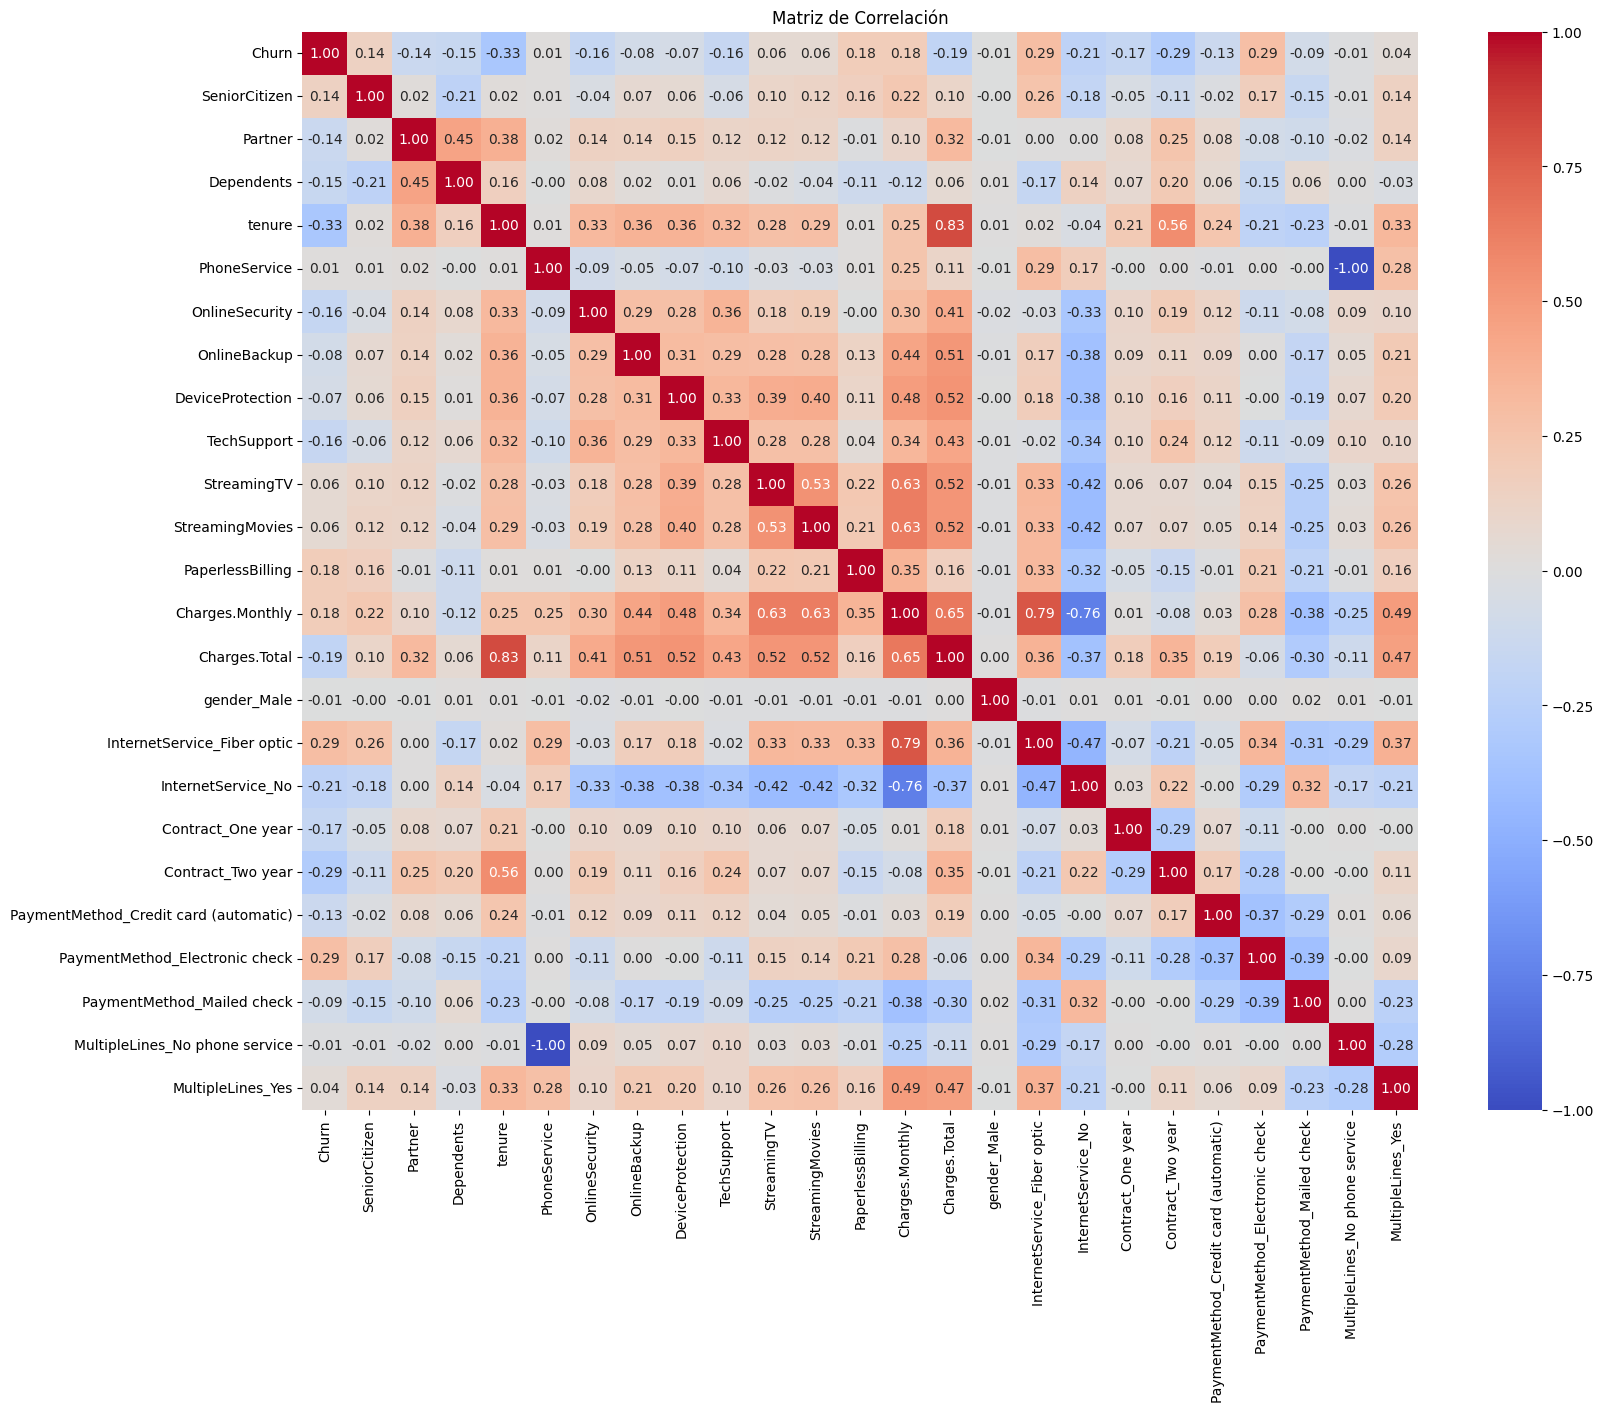


Correlación con 'Churn':
Churn                                    1.000000
InternetService_Fiber optic              0.292576
PaymentMethod_Electronic check           0.287357
PaperlessBilling                         0.184575
Charges.Monthly                          0.180306
SeniorCitizen                            0.144564
StreamingTV                              0.058384
StreamingMovies                          0.056731
MultipleLines_Yes                        0.037681
PhoneService                             0.008845
gender_Male                             -0.005137
MultipleLines_No phone service          -0.008845
DeviceProtection                        -0.066228
OnlineBackup                            -0.078771
PaymentMethod_Mailed check              -0.085715
PaymentMethod_Credit card (automatic)   -0.128248
Partner                                 -0.138782
Dependents                              -0.153268
TechSupport                             -0.158111
OnlineSecurity          

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(datos_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Ver correlación con la variable objetivo
print("\nCorrelación con 'Churn':")
print(datos_encoded.corr()['Churn'].sort_values(ascending=False))

Eliminamos la columna "MultipleLines_No phone service" porque la variable "PhoneService" ya captura la información de esta característica.

In [ ]:
datos_encoded.drop(columns=['MultipleLines_No phone service'], inplace=True)

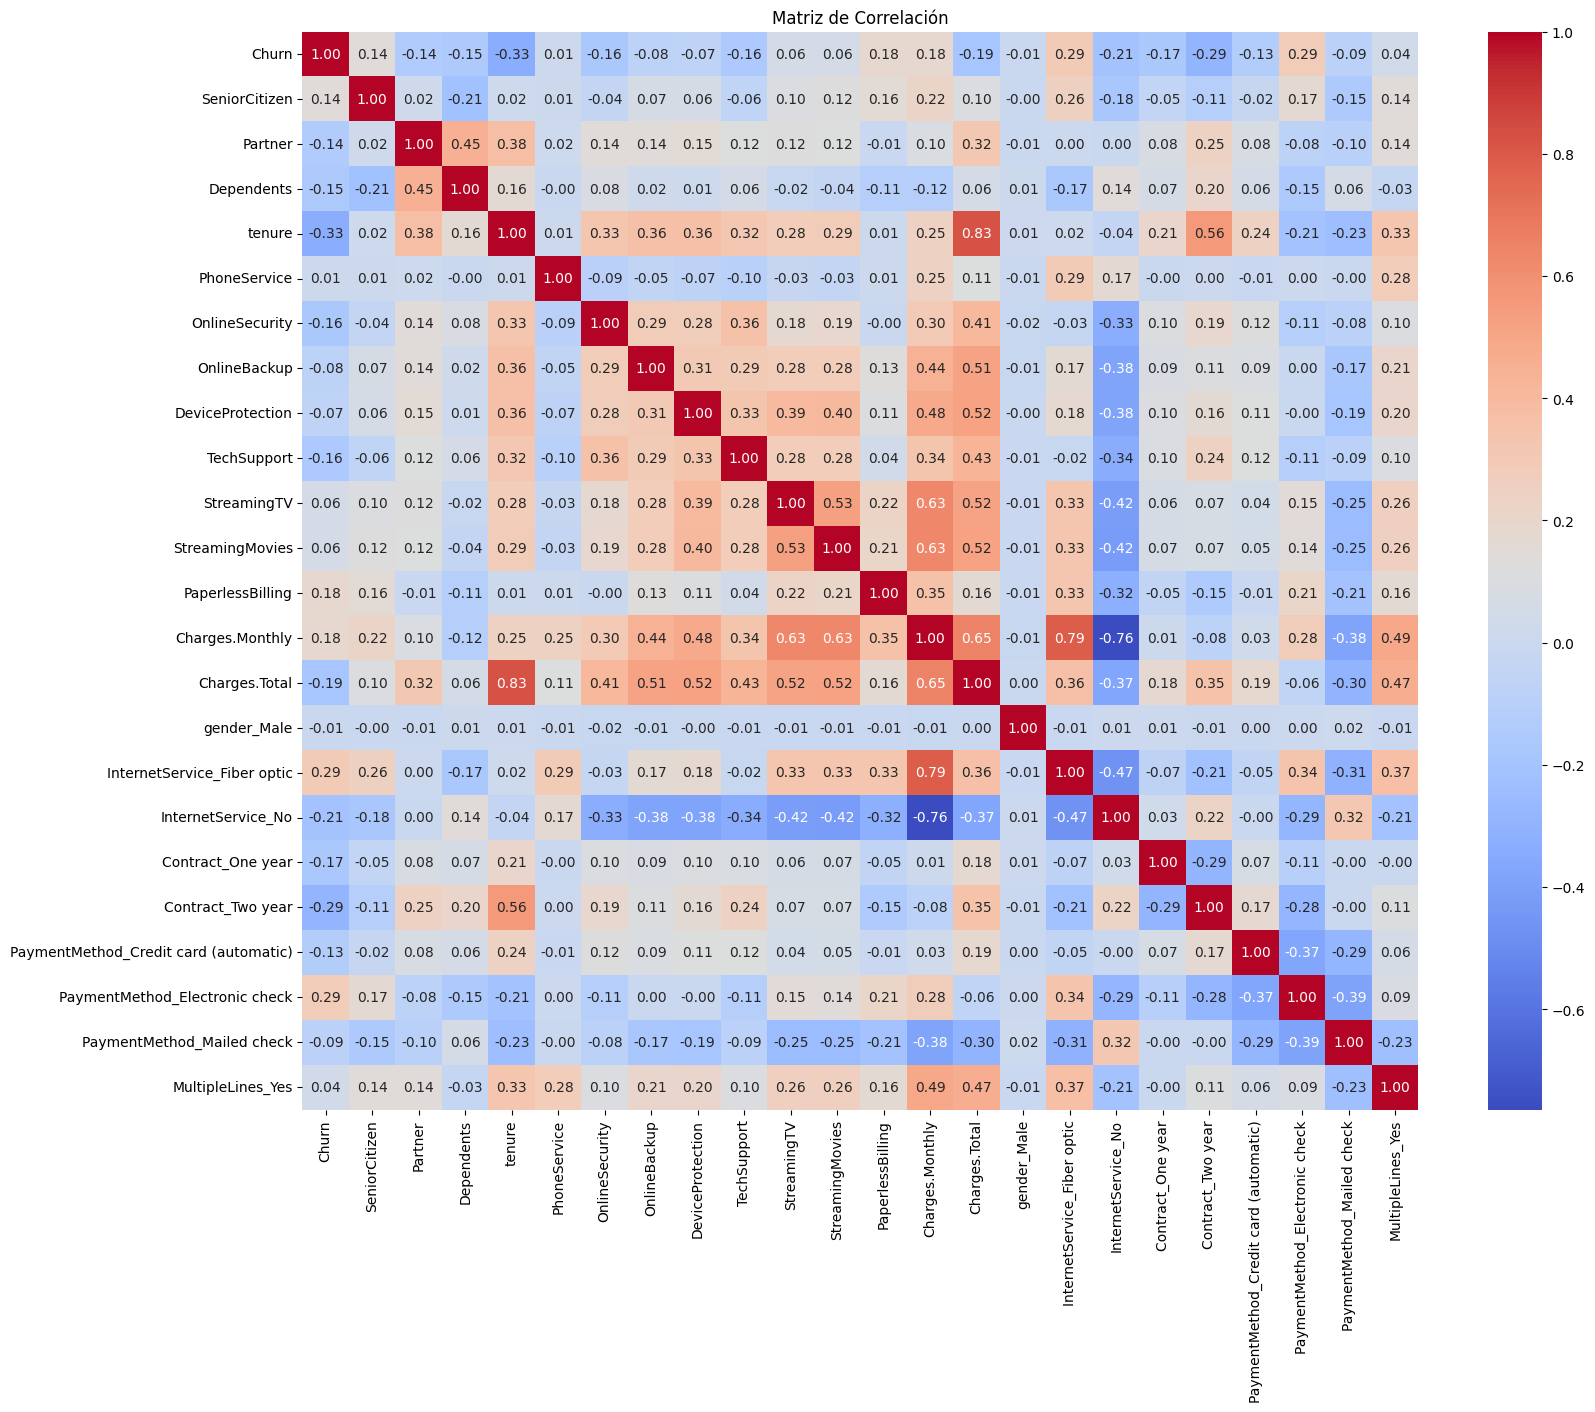


Correlación con 'Churn':
Churn                                    1.000000
InternetService_Fiber optic              0.292576
PaymentMethod_Electronic check           0.287357
PaperlessBilling                         0.184575
Charges.Monthly                          0.180306
SeniorCitizen                            0.144564
StreamingTV                              0.058384
StreamingMovies                          0.056731
MultipleLines_Yes                        0.037681
PhoneService                             0.008845
gender_Male                             -0.005137
DeviceProtection                        -0.066228
OnlineBackup                            -0.078771
PaymentMethod_Mailed check              -0.085715
PaymentMethod_Credit card (automatic)   -0.128248
Partner                                 -0.138782
Dependents                              -0.153268
TechSupport                             -0.158111
OnlineSecurity                          -0.164422
Contract_One year       

In [ ]:
# rehacemos la matriz de correlación

plt.figure(figsize=(18,14))
sns.heatmap(datos_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Ver correlación con la variable objetivo
print("\nCorrelación con 'Churn':")
print(datos_encoded.corr()['Churn'].sort_values(ascending=False))

---

##**Análisis Dirigido**

###**1. Tiempo de contrato × Cancelación (Boxplot)**

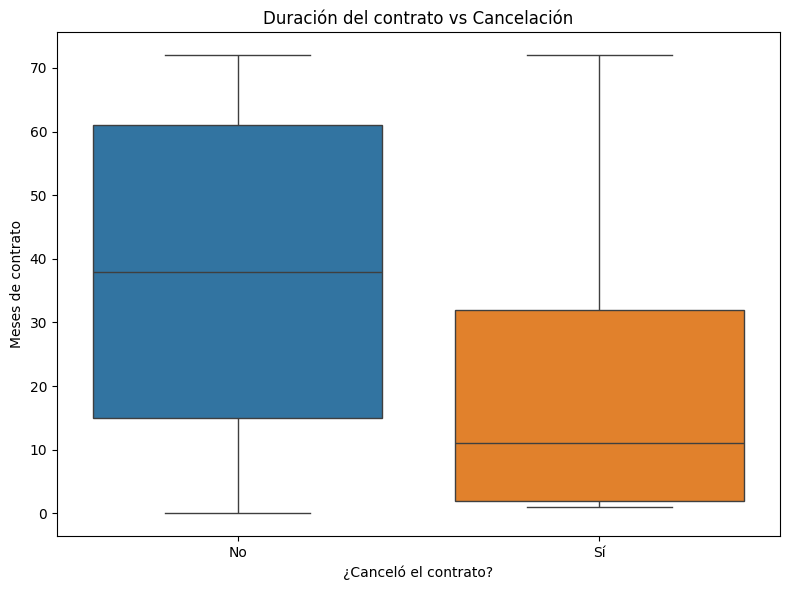

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

datos_encoded['Churn_label'] = datos_encoded['Churn'].map({0: 'No', 1: 'Sí'})

colores = {'No': "#1f77b4", 'Sí': "#ff7f0e"}

fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(
    x = 'Churn_label',
    y = 'tenure',
    hue = 'Churn_label',
    data = datos_encoded,
    palette = colores,
    dodge = False,
    showfliers = True,
    ax = ax
)

if ax.get_legend():
    ax.get_legend().remove()

ax.set_title('Duración del contrato vs Cancelación')
ax.set_xlabel('¿Canceló el contrato?')
ax.set_ylabel('Meses de contrato')

plt.tight_layout()
plt.show()

In [ ]:
datos_encoded.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
1,2093.0,19.433827,20.613094,1.0,2.0,11.0,32.0,72.0


Podemos ver que los clientes que se van tienen un corto tiempo de permanencia en la empresa. Esto podría revelar que la experiencia de los clientes (contratación, atención, expectativas, uso del servicio) podría estar teniendo un gran impacto en la fidelidad.


###**2. Gasto total × Cancelación**

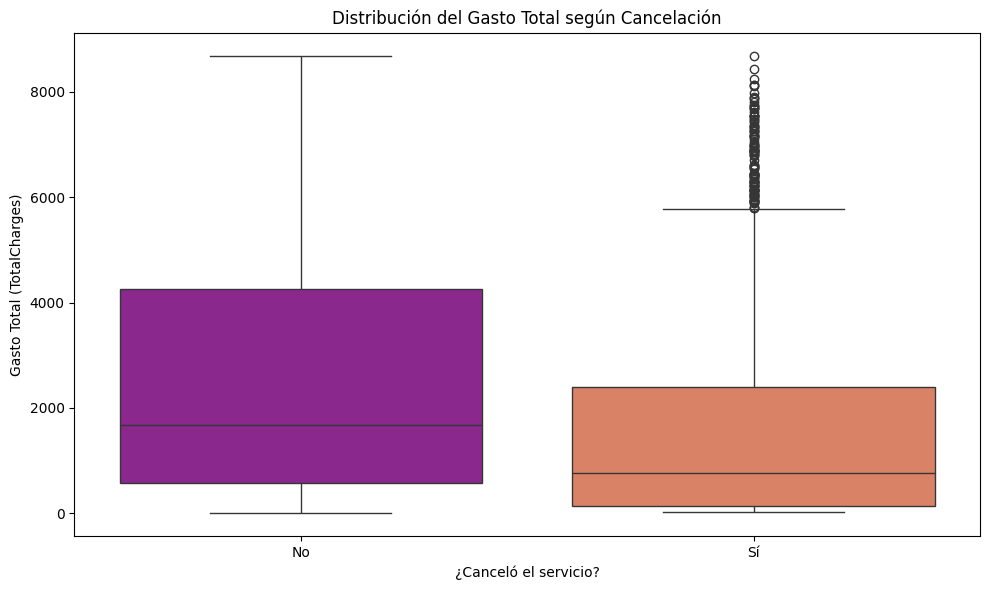

In [ ]:
datos_encoded['Churn_label'] = datos_encoded['Churn'].map({0: 'No', 1: 'Sí'})

plt.figure(figsize=(10, 6))
sns.boxplot(
    data = datos_encoded,
    x = 'Churn_label',
    y = 'Charges.Total',
    hue = 'Churn_label',
    palette = 'plasma',
    dodge = False
)

plt.legend_.remove() if plt.gca().legend_ else None

plt.title('Distribución del Gasto Total según Cancelación')
plt.xlabel('¿Canceló el servicio?')
plt.ylabel('Gasto Total (TotalCharges)')
plt.tight_layout()
plt.show()

**Interpretación**

Al observar el gráfico, se puede notar lo siguiente:
- Los clientes que cancelaron el servicio tienden a tener un gasto total más bajo en comparación con los que no lo hicieron.
- La caja de los que cancelaron es más estrecha, lo que indica que sus gastos están más concentrados en un rango reducido.
- En cambio, los que no cancelaron muestran una mayor variabilidad en el gasto, incluyendo algunos casos con montos muy altos.


**Conclusión**

Este análisis sugiere que los clientes con menor gasto total podrían estar más propensos a cancelar el servicio. Esta información puede ser útil para la empresa al momento de diseñar estrategias de retención, por ejemplo, ofreciendo beneficios o atención especial a clientes con bajo gasto para evitar que se vayan.


---

##**Separación de Datos**

In [ ]:
from sklearn.model_selection import train_test_split

X = datos_encoded.drop('Churn', axis = 1)
y = datos_encoded['Churn']

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 66)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 66, stratify = y)

print(f'Tamaño entrenamiento: {X_train.shape[0]} registros')
print(f'Tamaño validación: {X_val.shape[0]} registros')
print(f'Tamaño prueba: {X_test.shape[0]} registros')

Tamaño entrenamiento: 3560 registros
Tamaño validación: 1526 registros
Tamaño prueba: 2181 registros


---

##**Creación de Modelos**

###**Árbol de Decisión**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier()
modelo_dt.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo_dt.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de valicación es de: {modelo_dt.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.9862359550561798
La exactitud del modelo con el conjunto de valicación es de: 0.6979030144167759


In [ ]:
from sklearn.model_selection import GridSearchCV

# probar la profundidad de las ramas
param_grid = {'max_depth': range(1, 21)}

# Crear el modelo base
dt = DecisionTreeClassifier(random_state = 66)

# Búsqueda con validación cruzada
grid_search = GridSearchCV(dt, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

# Mejor profundidad
print("Mejor profundidad:", grid_search.best_params_['max_depth'])
print("Mejor score de validación:", grid_search.best_score_)

Mejor profundidad: 5
Mejor score de validación: 0.7733146067415732


In [ ]:
modelo_dt = DecisionTreeClassifier(max_depth = 5, random_state = 66)
modelo_dt.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo_dt.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de valicación es de: {modelo_dt.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.7980337078651686
La exactitud del modelo con el conjunto de valicación es de: 0.7588466579292268


In [ ]:
modelo_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=66)

In [ ]:
y_pred_val_arbol = modelo_dt.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'La precisión del modelo es: {precision_score(y_val, y_pred_val_arbol)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val, y_pred_val_arbol)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val, y_pred_val_arbol)}')

La precisión del modelo es: 0.5978260869565217
La sensibilidad (Recall) del modelo es: 0.5
La exactitud (accuracy) del modelo es: 0.7588466579292268


In [ ]:
print(classification_report(y_val, y_pred_val_arbol))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1086
           1       0.60      0.50      0.54       440

    accuracy                           0.76      1526
   macro avg       0.70      0.68      0.69      1526
weighted avg       0.75      0.76      0.75      1526



###**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state=66)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=66)

In [ ]:
y_pred_val_rf = modelo_rf.predict(X_val)

In [ ]:
print(f'La precisión del modelo es: {precision_score(y_val, y_pred_val_rf)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val, y_pred_val_rf)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val, y_pred_val_rf)}')

La precisión del modelo es: 0.6787003610108303
La sensibilidad (Recall) del modelo es: 0.42727272727272725
La exactitud (accuracy) del modelo es: 0.7765399737876802


In [ ]:
print(classification_report(y_val, y_pred_val_rf))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1086
           1       0.68      0.43      0.52       440

    accuracy                           0.78      1526
   macro avg       0.74      0.67      0.69      1526
weighted avg       0.76      0.78      0.76      1526



- **Regresión Logística o KNN**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

modelo_rl = LogisticRegression(max_iter=1000)
modelo_rl.fit(X_train_scaled, y_train)

y_pred_rl = modelo_rl.predict(X_test_scaled)

print('Regresión Logística')
print('Precisión:', accuracy_score(y_test, y_pred_rl))
print(classification_report(y_test, y_pred_rl))

Regresión Logística
Precisión: 0.786336542870243
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1553
           1       0.66      0.53      0.59       628

    accuracy                           0.79      2181
   macro avg       0.74      0.71      0.72      2181
weighted avg       0.78      0.79      0.78      2181



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

modelo_rl = LogisticRegression(max_iter=2000, class_weight='balanced', penalty='l2')
#modelo_rl = LogisticRegression(max_iter=1000)
modelo_rl.fit(X_train_scaled, y_train)

y_pred_rl = modelo_rl.predict(X_test_scaled)

print('Regresión Logística')
print('Precisión:', accuracy_score(y_test, y_pred_rl))
print(classification_report(y_test, y_pred_rl))

Regresión Logística
Precisión: 0.7326914259513985
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1553
           1       0.52      0.78      0.63       628

    accuracy                           0.73      2181
   macro avg       0.71      0.75      0.71      2181
weighted avg       0.78      0.73      0.74      2181



---

##**Evaluación de los Modelos**

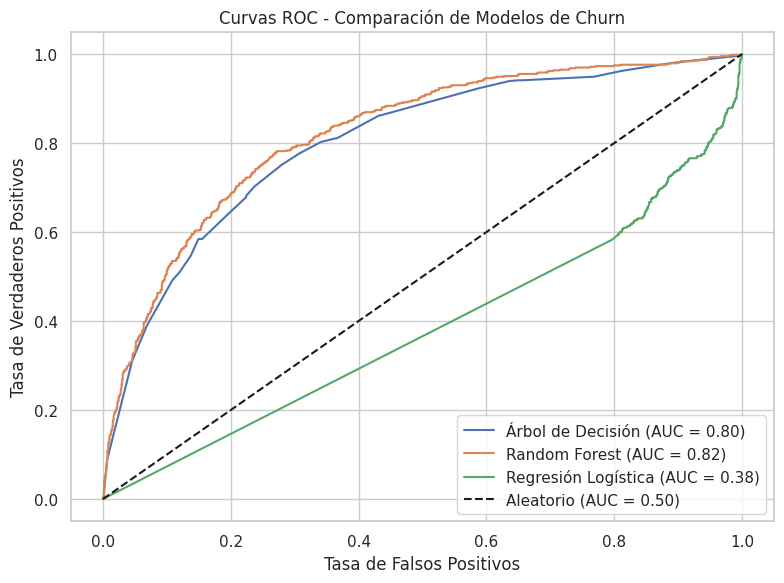

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Función para graficar la curva ROC de cualquier modelo
def graficar_roc(modelo, X_test, y_test, nombre_modelo):
    # Obtener las probabilidades de clase positiva
    y_scores = modelo.predict_proba(X_test)[:, 1]

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)

    # Graficar
    plt.plot(fpr, tpr, label=f'{nombre_modelo} (AUC = {auc:.2f})')

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar cada modelo
graficar_roc(modelo_dt, X_test, y_test, 'Árbol de Decisión')
graficar_roc(modelo_rf, X_test, y_test, 'Random Forest')
graficar_roc(modelo_rl, X_test, y_test, 'Regresión Logística')

# Línea base (modelo aleatorio)
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.50)')

# Personalización del gráfico
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC - Comparación de Modelos de Churn')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

modelos = {
    "Árbol de Desición": modelo_dt,
    "Random Forest": modelo_rf,
    "Regresión Logística": modelo_rl
}

resultados = []

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    matriz = confusion_matrix(y_test, y_pred)

    resultados.append({
        "Modelo": nombre,
        "Exactitud": acc,
        "Precisión": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Matriz": matriz
    })

# Mostrar resultados
for r in resultados:
    print(f"{r['Modelo']}")
    print(f"  Exactitud : {r['Exactitud']:.3f}")
    print(f"  Precisión : {r['Precisión']:.3f}")
    print(f"  Recall    : {r['Recall']:.3f}")
    print(f"  F1-Score  : {r['F1-Score']:.3f}")
    print(f"  Matriz de confusión:\n{r['Matriz']}")
    print("-" * 40)

Árbol de Desición
  Exactitud : 0.773
  Precisión : 0.632
  Recall    : 0.510
  F1-Score  : 0.564
  Matriz de confusión:
[[1367  186]
 [ 308  320]]
----------------------------------------
Random Forest
  Exactitud : 0.783
  Precisión : 0.688
  Recall    : 0.449
  F1-Score  : 0.543
  Matriz de confusión:
[[1425  128]
 [ 346  282]]
----------------------------------------
Regresión Logística
  Exactitud : 0.279
  Precisión : 0.252
  Recall    : 0.763
  F1-Score  : 0.379
  Matriz de confusión:
[[ 129 1424]
 [ 149  479]]
----------------------------------------


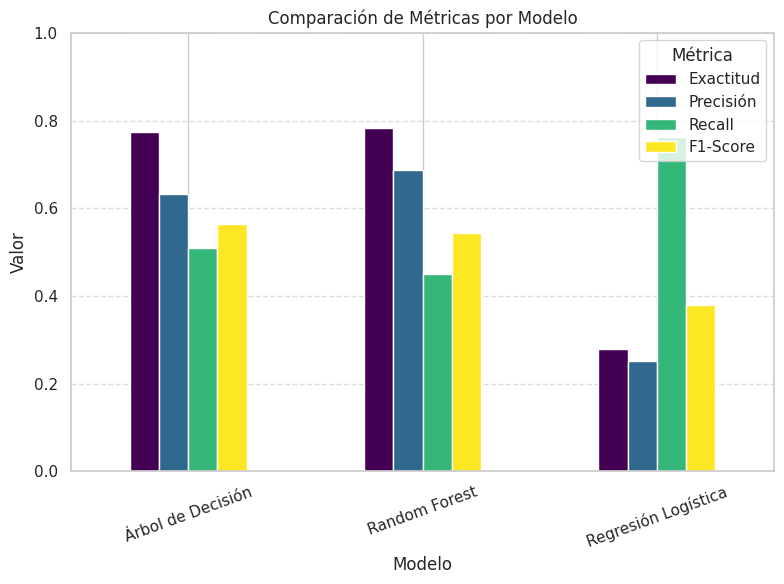

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos que me diste
data = {
    "Modelo": ["Árbol de Decisión", "Random Forest", "Regresión Logística"],
    "Exactitud": [0.773, 0.783, 0.279],
    "Precisión": [0.632, 0.688, 0.252],
    "Recall": [0.510, 0.449, 0.763],
    "F1-Score": [0.564, 0.543, 0.379]
}

df = pd.DataFrame(data)
df.set_index("Modelo", inplace=True)

# Crear gráfico
ax = df.plot(kind="bar", figsize=(8, 6), colormap="viridis")

# Personalizar gráfico
plt.title("Comparación de Métricas por Modelo")
plt.ylabel("Valor")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.legend(title="Métrica")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.tight_layout()
plt.show()

---
---

Conclusión:
Me temo que ya no puedo seguir con el análisis, está muy complejo para los conocimientos que poseo. Hice mi mejor esfuerzo considerando los problemas que tuve (que no son excusa) pero la exigencia es demasiada para alguien que recién comienza en el estudio de la ingeniería de datos.
Muchas gracias por haberme considerado para el curso... fue muy satisfactorio para mí haber aprendido algo de Machine Learning, es un tema apacionante pero ya no me queda tiempo para hacer lo que se exige como último desafío.
